<a href="https://colab.research.google.com/github/sholdenjones/practice/blob/main/MLBSavant_Python_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Table of Contents**

[Introduction #1 - Python, Google Colab, Loading Data](https://colab.research.google.com/drive/16TzR2xYeLiye7Gt6KCsz5qCvhDZhVn2g?usp=sharing) <-- *you're currently here*

[Introduction #2 - Pandas, Baseball Savant Dataset](https://colab.research.google.com/drive/1rTZOQUGMZ-KVsuLhdKY87DfI5YAoHo3h?usp=sharing)

[Getting Into It - Data Aggregation](https://colab.research.google.com/drive/1gjyj6qXUyW-hvT_MnuVZc0Ysx2xi4O8-?usp=sharing)

# Introduction

## Google Colab Intro

Hello and welcome! My name is Jon Anderson, and I've decided to make a little bit of a free online class about Python programming in conjunction with Baseball Savant data.

There are near infinite things you can do with Python and this powerful dataset, and learning more about both opens a whole new world of baseball analysis. Let's start with the very, very basics.

**What are you looking at right now?**
The page you are on right now is a called Google Colab. It is a Python environment that is hosted right on Google's own servers. That means you can access your saved notebooks from any device and you need not install anything on your devices to write and run code.

If you know nothing about about Python, it might be best to start with some super-basic YouTube videos about it.

**[Here's a five minute video to get you started](https://www.youtube.com/watch?v=I2wURDqiXdM)**


These notebooks will be combinations of text explanation and code blocks. Here's an example code block for you to get familiar:

In [ ]:
print(1+2)
print('Hello, World!')

3
Hello, World!


If you hover over that code block, you'll see a play button. When you click that, it executes the codes in the code block. This will become more clear as we move forward, I don't want to spend too much time on Python basics right now, as I'm assuming people coming to this resource are already somewhat familiar.

One thing to remember is that since we'll be divvying up our code blocks, the order in which you run the blocks makes a big difference. You will want to make sure you're running the code blocks in order, as we will be importing packages and establishing variables early on in the notebooks to use them later, and if those blocks aren't run first, the later blocks will fail. Here's an example of a code block that will fail

In [ ]:
print(my_variable)

10


That block failed because we had not assigned anything into that variable yet. Run this next code block, and then go back and run the previous one to see the error go away.

In [ ]:
my_variable = 10

## Dataset Intro

The Baseball Savant dataset is a record of every single pitch thrown in every MLB game. In lamens terms, it is a massive table of data. It gives a row to every pitch thrown, which as you can imagine generates an enormous number of rows. There are about 90 columns in the base dataset as well, which means that there are that many pieces of information about each pitch thrown. We will be adding lots of columns as well in order to generate more insights, but the first thing to get somewhat familiar with is what columns come in initially.

Save off this resource, as it's the "data dictionary" from baseball savant itself. It gives the column names and a quick description of each.

**[Baseball Savant Column Descriptions](https://baseballsavant.mlb.com/csv-docs)**

There is no better way to learn than to just get right into the thick of it. So let's load the data and have a look at it.

## Packages Intro

We will be depending on several "packages" here. Packages are just collections code that other people have written that we can import and use for our own purposes.

Here's a quick rundown of the packages we will be using as we move forward.

**Pandas**: This is the most important Python package for us, as it is Python's "table management" package. Think of it a little bit like you do of Microsoft Excel. It will be the package we use to manipulated the Baseball Savant dataset. [Pandas Documentation Can Be Found here](https://pandas.pydata.org/)

**NumPy**: This package is an extension of python that lets use do more mathematic operations. [NumPy documentation here](https://numpy.org/)

**PyBaseball**: This is what we will use to load the Baseball Savant data. It reaches right into Baseball Savant's databases and gets the up-to-date data set. You will only need to know the lines of code to load the dataset, after the data is loaded we no longer use this. PyBaseball is not installed on Google's servers by default, so every time we open a notebook we have to install it first, and you'll see that in the next section. [PyBaseball Introduction](https://jamesrledoux.com/projects/open-source/introducing-pybaseball/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Data

### Recommended Step: Map Google Drive
If you want to save off the data to your Google drive (I recommend this so you don't have to do the time-consuming process of loading the full dataset from the API every time you open the notebook), you will have to first sign into Google and map your drive.

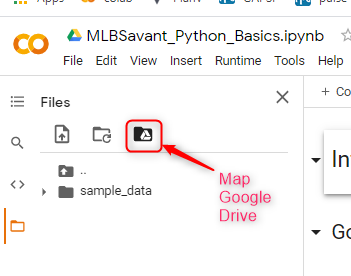

## Step 1: Install PyBaseball
This is one line of code, very simple. Run this line of code to import the data

In [ ]:
!pip install pybaseball

We also want to install a package called "unidecode" which will help us replace the accented characters with English characters, this makes things much easier for us with searching players later on since the accented letters aren't on the English keyboard

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.0 MB/s eta 0:00:00


## Step 2: Load functions
This line will import all three functions we need

In [ ]:
import pandas as pd, pybaseball as pyb, numpy as np
from datetime import date
from unidecode import unidecode

We will also get today's date in a variable that we will use to load the most recent version of the savant dataset

In [ ]:
today = date.today()
if (today.month < 10) & (today.day < 10):
  todaysdate = str(today.year) + '-0' + str(today.month) + '-0' + str(today.day)

elif (today.month < 10) & (today.day >= 10):
  todaysdate = str(today.year) + '-0' + str(today.month) + '-' + str(today.day)

elif (today.month >= 10) & (today.day < 10):
  todaysdate = str(today.year) + '-' + str(today.month) + '-0' + str(today.day)

else:
  todaysdate = str(today.year) + '-' + str(today.month) + '-' + str(today.day)

print(todaysdate)

2025-09-10


## Step 3: Declare functions to load the data

The function below will import the full dataset based on the dates you specify. The date format is this: 2021-04-01

The base dataset does not have batter names, it only has their ID numbers. To get the batter names we have to make a new column and then map in the names based on an external file that some people have generated (thanks to Jeff Zimmerman at smartfantasybaseball.com!).

In [ ]:
import pandas as pd, pybaseball as pyb, numpy as np
from datetime import date
from unidecode import unidecode
import pybaseball.cache

pybaseball.cache.enable()

def loadSav(startdate, enddate):
  sav = pyb.statcast(start_dt=startdate, end_dt=enddate)
  print('{} Rows Imported'.format(str(len(sav))))

  # Change formatting of pitcher names
  sav['player_name'] = sav['player_name'].str.split(', ').str[::-1].str.join(' ')


  # Load Player Name Lookup file
  player_id_url = 'https://www.smartfantasybaseball.com/wp-content/uploads/2015/10/SFBB-Player-ID-Map.xlsx'
  idlookup = pd.read_excel(player_id_url)
  idlookup = idlookup[idlookup['PLAYERNAME']!='Last Player']
  sav_id_dict = dict(zip(idlookup.MLBID, idlookup.PLAYERNAME))

  # Map the names with the map function
  sav['BatterName'] = sav['batter'].map(sav_id_dict)
  sav['on_1b'] = sav['on_1b'].replace(sav_id_dict)
  sav['on_2b'] = sav['on_2b'].replace(sav_id_dict)
  sav['on_3b'] = sav['on_3b'].replace(sav_id_dict)

  # Decode foreign characters
  sav['player_name']= sav['player_name'].apply(unidecode)

  # All done, return the dataframe in a variable called 'sav'
  return(sav)

## Add Ons
I wrote this code up myself. What it does is gives us more columns so we can sum up hits, swings, contact made, plate appearances, at-bats, etc.

The way it works is that it uses the "events" and "description" fields to classify if each pitch resulted in each possibility.

So, for example, certain values in the "events" column signify a player appearance coming to an end. We can add a 1 to the new "PA_flag" column in rows where those events occur. This allows us then to sum up that column for any player and that tell us how many plate appearances they have in the data. This is extremely useful for generating stats.

It's quite a bit of code because we have to establish all these lookup dictionaries, you don't have to worry too much about the code - but it's useful to try and see how it's working.

In [ ]:
# PA Flag Dictionary - This specifies which events constitute a plate appearance ending :: based on events column
pa_flag_dict = {'field_out':1,'nan':0,'strikeout':1,'double':1,'strikeout_double_play':1,
                'single':1,'force_out':1,'hit_by_pitch':1,'grounded_into_double_play':1,
                'home_run':1,'walk':1,'caught_stealing_2b':0,'sac_bunt':1,'triple':1,
                'sac_fly':1,'field_error':1,'double_play':1,'catcher_interf':1,'fielders_choice_out':1,
                'fielders_choice':1,'pickoff_1b':0,'other_out':0,'caught_stealing_home':0,'pickoff_caught_stealing_2b':0,
                'caught_stealing_3b':0,'sac_fly_double_play':1,'pickoff_caught_stealing_home':0,'pickoff_2b':0,'run':0,
                'triple_play':1,'batter_interference':1,'pickoff_3b':0,'sac_bunt_double_play':1,'pickoff_caught_stealing_3b':0}

# AB Flag Dictionary - This specifies which events constitute an at-bat ending :: based on events column
ab_flag_dict = {'field_out':1,'nan':0,'strikeout':1,'double':1,
                'strikeout_double_play':1,'single':1,'force_out':1,'hit_by_pitch':0,
                'grounded_into_double_play':1,'home_run':1,'walk':0,'caught_stealing_2b':0,
                'sac_bunt':0,'triple':1,'sac_fly':0,'field_error':1,
                'double_play':1,'catcher_interf':0,'fielders_choice_out':1,'fielders_choice':1,
                'pickoff_1b':0,'other_out':0,'caught_stealing_home':0,'pickoff_caught_stealing_2b':0,
                'caught_stealing_3b':0,'sac_fly_double_play':1,'pickoff_caught_stealing_home':0,'pickoff_2b':0,
                'run':0,'triple_play':1,'batter_interference':1,'pickoff_3b':0,'sac_bunt_double_play':1,'pickoff_caught_stealing_3b':0}

# Is Hit Dictionary - This puts a 1 for events that are hits (singles, doubles, triples, homers) and a zero for everything else :: based on events column
is_hit_dict = {'field_out':0,'nan':0,'strikeout':0,'double':1,'strikeout_double_play':0,
                'single':1,'force_out':0,'hit_by_pitch':0,'grounded_into_double_play':0,'home_run':1,
                'walk':0,'caught_stealing_2b':0,'sac_bunt':0,'triple':1,'sac_fly':0,
                'field_error':0,'double_play':0,'catcher_interf':0,'fielders_choice_out':0,'fielders_choice':0,
                'pickoff_1,b':0,'other_out':0,'caught_stealing_home':0,'pickoff_caught_stealing_2b':0,'caught_stealing_3b':0,
                'sac_fly_double_play':0,'pickoff_caught_stealing_home':0,'pickoff_2b':0,'run':0,'triple_play':0,'batter_interference':0,
                'pickoff_3b':0,'sac_bunt_double_play':0,'pickoff_caught_stealing_3b':0}

# Swing Dictionary - This puts a 1 for a row where the batter swung and a 0 for when they didn't :: based on the description column
swing_dict = {'ball':0,'foul_tip':1,'called_strike':0,'swinging_strike':1, 'pitchout': 0, 'bunt_foul_tip': 1,
                'foul':1,'hit_into_play_no_out':1,'hit_into_play':1,'hit_into_play_score':1, 'missed_bunt': 1,
                'hit_by_pitch':0,'blocked_ball':0,'swinging_strike_blocked':1, 'foul_bunt': 1}

# Fair Contact Dict - Puts a 1 for pitches there were put in play (fair) :: based on description column
fair_contact_dict = {'ball':0,'foul_tip':0,'called_strike':0,'swinging_strike':0, 'pitchout': 0,
                'foul':0,'hit_into_play_no_out':1,'hit_into_play':1, 'missed_bunt': 0,
                'hit_into_play_score':1,'hit_by_pitch':0, 'bunt_foul_tip': 0,
                'blocked_ball':0,'swinging_strike_blocked':0, 'foul_bunt': 0}

# Foul or Fair Contact Dict - Puts a 1 for pitches there were put in play (includes foul balls) :: based on description column
foul_contact_dict = {'ball':0,'foul_tip':1,'called_strike':0,'swinging_strike':0, 'pitchout': 0,
                'foul':1,'hit_into_play_no_out':1,'hit_into_play':1, 'missed_bunt': 0,
                'hit_into_play_score':1,'hit_by_pitch':0, 'bunt_foul_tip': 1,
                'blocked_ball':0,'swinging_strike_blocked':0, 'foul_bunt': 1}

def addOns(sav):
  sav['game_date'] = pd.to_datetime(sav['game_date'])
  sav = sav.sort_values(by='game_date')

  sav['PA_flag'] = sav['events'].map(pa_flag_dict)
  sav['AB_flag'] = sav['events'].map(ab_flag_dict)
  sav['Is_Hit'] = sav['events'].map(is_hit_dict)
  sav['Is_Hit'] = sav['Is_Hit'].fillna(0)
  sav['SwungOn'] = sav['description'].map(swing_dict)
  sav['ContactMade_Fair'] = sav['description'].map(fair_contact_dict)
  sav['ContactMade_Foul'] = sav['description'].map(foul_contact_dict)

  sav['BatterTeam'] = np.where(sav['inning_topbot']=='Top', sav['away_team'], sav['home_team'])
  sav['PitcherTeam'] = np.where(sav['inning_topbot']=='Top', sav['home_team'], sav['away_team'])
  return(sav)

## Step 4: Load the data
Now after we have all of those code blocks run, we just need to send two dates through the loadSav function and save the resulting dataframe (table) to a variable.

If you want to load the data up to the current day, run this:

```
sav = loadSav('2021-04-01', todaysdate)
```

For time's sake, I'm just going to load one month of data, but feel free to change the dates below if you like

In [ ]:
sav = loadSav('2021-04-01','2021-10-01')

This is a large query, it may take a moment to complete


  0%|          | 0/184 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = 

701173 Rows Imported


HTTPError: HTTP Error 406: Not Acceptable

In [ ]:
sav = addOns(sav)

NameError: name 'sav' is not defined

In [ ]:
sav.to_csv('/content/drive/My Drive/Tutorials/FLB/Data/savant_data/sav21_new.csv')

This can take awhile to load depending on how much data you're calling, so it's best to save off a copy to your Google Drive once it's loaded, and then you can just load the data from your Googel Drive directly instead of doing that process every time. This line of code will save it off, but you have to specify where it should be saved in your own Google Drive



```
sav.to_csv('/content/drive/My Drive/SavantData.xlsx')
```

If you've already saved off the data to your Google drive, you can import it with this line, calling the variable whatever you want (I'm calling it "sav")

```
sav = pd.read_csv('/content/drive/My Drive/SavantLearning/savantdata.xlsx')
```

Here is how you save and load a file from your Google Drive

In [ ]:
# how to save the file
sav.to_csv('/content/drive/My Drive/SavantLearning/savantdata.csv')

In [ ]:
# how to load the file
sav = pd.read_csv('/content/drive/My Drive/SavantLearning/savantdata.csv')

# Viewing The Data

Now you have the huge dataset in the variable called "sav" (you could call this whatever you wanted, of course)

Now let's take a peak into it

In [ ]:
# This will show you the shape of the table in the format (number of rows, number of columns)
print(sav.shape)

(393780, 94)


In [ ]:
# Print the first 3 rows with the "head" command
sav.head(3)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,BatterName
0,2562,CU,2021-07-11,85.5,-1.41,6.14,Chad Green,514888,643338,home_run,hit_into_play,NaN,NaN,NaN,NaN,14.0,Jose Altuve homers (20) on a fly ball to left ...,R,R,R,HOU,NYY,X,NaN,fly_ball,1,1,2021,0.61,-0.07,0.00,1.00,647351.0,NaN,664702.0,1,9,Bot,48.56,71.92,...,96.6,34.0,85.9,2556.0,6.6,633340,643338,596142.0,572228.0,518934.0,570482.0,650402.0,641796.0,458731.0,592450.0,53.91,0.194,0.344,2.0,1.0,0.0,3.0,5.0,85,3,Curveball,5,7,5,7,7,8,8,7,Standard,Standard,40.0,0.799,2.144,Jose Altuve
1,2665,CU,2021-07-11,86.0,-1.47,6.11,Chad Green,514888,643338,NaN,ball,NaN,NaN,NaN,NaN,13.0,Jose Altuve homers (20) on a fly ball to left ...,R,R,R,HOU,NYY,B,NaN,NaN,0,1,2021,0.36,-0.26,-0.97,2.04,647351.0,NaN,664702.0,1,9,Bot,NaN,NaN,...,NaN,NaN,85.9,2454.0,6.5,633340,643338,596142.0,572228.0,518934.0,570482.0,650402.0,641796.0,458731.0,592450.0,54.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,2,Curveball,5,7,5,7,7,5,5,7,Standard,Standard,57.0,-0.201,0.020,Jose Altuve
2,2811,FF,2021-07-11,96.1,-1.41,6.16,Chad Green,514888,643338,NaN,called_strike,NaN,NaN,NaN,NaN,3.0,Jose Altuve homers (20) on a fly ball to left ...,R,R,R,HOU,NYY,S,NaN,NaN,0,0,2021,-0.36,1.60,0.54,2.41,647351.0,NaN,664702.0,1,9,Bot,NaN,NaN,...,NaN,NaN,96.3,2554.0,6.7,633340,643338,596142.0,572228.0,518934.0,570482.0,650402.0,641796.0,458731.0,592450.0,53.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,1,4-Seam Fastball,5,7,5,7,7,5,5,7,Standard,Standard,201.0,-0.201,-0.071,Jose Altuve


You can scroll through there and see all 93 columns, or you can select just certain columsn to view like this

In [ ]:
sav[['game_date','player_name','inning','BatterName','pitch_type','release_speed','launch_speed','launch_angle','events','description']].head(3)

You can filter like this. If we want to see some data on all of Shohei Ohtani's home runs, we could do this

In [ ]:
shohei_hrs = sav[(sav['BatterName']=='Shohei Ohtani') & (sav['events']=='home_run')]
shohei_hrs = shohei_hrs.sort_values(by=['game_date','inning','at_bat_number'])
shohei_hrs[['game_date','player_name','inning','BatterName','pitch_type','release_speed','launch_speed','launch_angle','events','hit_distance_sc']]

# Conclusion

So that's the end of the introduction. In this notebook we learned a little bit about Google Colab and also went over how to load the baseball savant data set. This is a good start, and later on we'll dive into the data and start showing off some of the insights we can derive from it!